In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

1. Comparação entre sexos

## Comparação entre sexos

In [2]:
df = pd.read_csv('AgeDatasetClean.csv', sep='|')
df

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...,...,...
732956,Wim de Vreng,Dutch swimmer,Male,Kingdom of the Netherlands,Athlete,1930,1980.0,50.0
732957,James Smillie,goudsmid uit Schotland (1784-1841),Male,Scotland,Goldsmith,1784,1841.0,57.0
732958,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,67.0
732959,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,28.0


In [8]:
df.groupby(['Gender'])['Age of death'].mean().sort_values(ascending=False)

Gender
Intersex; Transgender Male                        79.000000
Female; Female                                    75.000000
Female; Male                                      71.428571
Female                                            71.307846
Transgender Person; Intersex; Transgender Male    71.000000
Male                                              69.185657
Transgender Male; Male                            67.000000
Transgender Female; Female                        65.000000
Intersex; Female                                  64.000000
Eunuch; Male                                      63.611111
Transgender Male; Female                          62.000000
Transgender Female; Intersex                      61.000000
Non-Binary                                        61.000000
Intersex                                          59.000000
Transgender Male                                  57.111111
Intersex; Male                                    55.500000
Eunuch                           

In [65]:
df_age = df.groupby(['Gender'])['Age of death'].agg(['count', 'mean', 'median'])

In [66]:
df_age

,count,mean,median
Gender,,,
Eunuch,1,76.000000,76.0
Eunuch; Male,13,63.384615,71.0
Female,73286,72.717995,77.0
Female; Female,1,75.000000,75.0
Female; Male,5,75.000000,73.0
Intersex,7,59.000000,55.0
Intersex; Female,1,38.000000,38.0
Intersex; Male,1,69.000000,69.0
Intersex; Transgender Male,1,79.000000,79.0


<AxesSubplot:xlabel='mean', ylabel='Gender'>

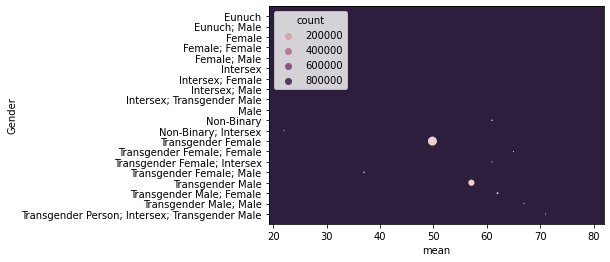

In [35]:
sns.scatterplot(
    data=df_age,
    x='mean',
    y='Gender',
    hue='count',
    s=df_age['count'],
)